In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.optimizers import SGD
import keras

from experiments.weightInitialization import *
from experiments.FeedforwardExperiment import FeedforwardExperiment
from experiments.Dataset import BostonDataset

import matplotlib.pyplot as plt
import seaborn as sbn
import os

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
boston = BostonDataset()
X_train, Y_train = boston.getTrainingData()
X_test, Y_test = boston.getTestData()

dataParameters = boston.getDataParameters()

In [4]:
nModel = 4
adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
parameters = {
    'nModel': nModel,
    'loss': "mean_squared_error",    
    'optimizer': "adam",
    'architecture': [50],
    'softmax': False
}

outputPath = os.path.join(os.getcwd(), '..', 'report', 'images')

In [5]:
weightDistributionParameters = []
for i in range(nModel):
    weightDistributionParameters.append({
            'mean': 0,
            'variance': i + 1
    })
    

In [6]:
experiment = FeedforwardExperiment("boston_adam_no_soft_max", parameters, dataParameters, True)
experiment.setValidationData(X_test, Y_test)

In [7]:
experiment.initializeWeights(normalWeightInitializer, weightDistributionParameters)

In [8]:
runParameters= {        
    'nEpoch': 5,
    'nMetaEpoch': 50,
    'weightDiffThreshold': 0.1,
    'batch_size': 256,    
}

In [9]:
experiment.run(X_train, Y_train, **runParameters)

epoch 5
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 10
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 15
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 20
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 25
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 30
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 35
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 40
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 45
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 50
Training model 0
Training model 1
Training model 2
Training model 3
computing outcomes
epoch 55
Training model 0
Training model 

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Test_error


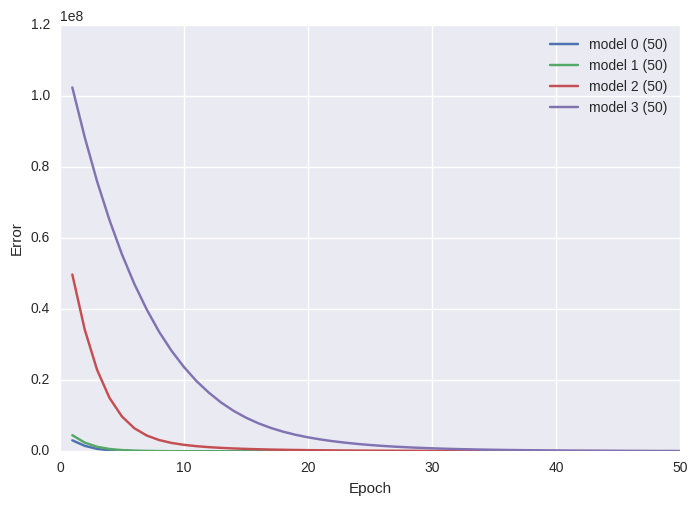

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Train_error


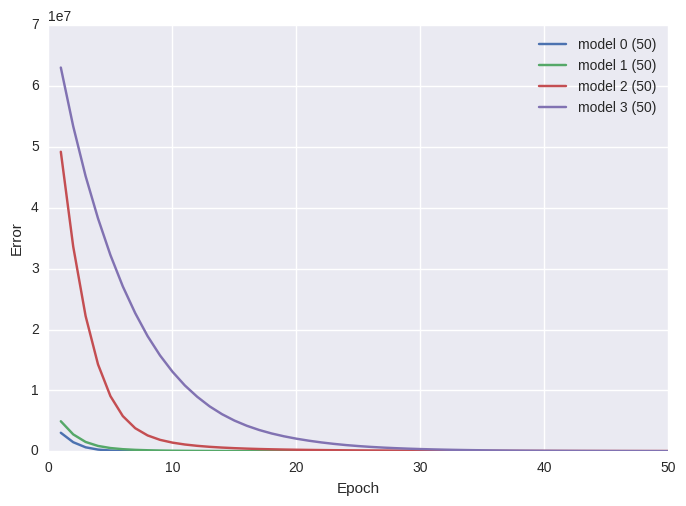

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Number_of_label_not_identically_classfied_(train)


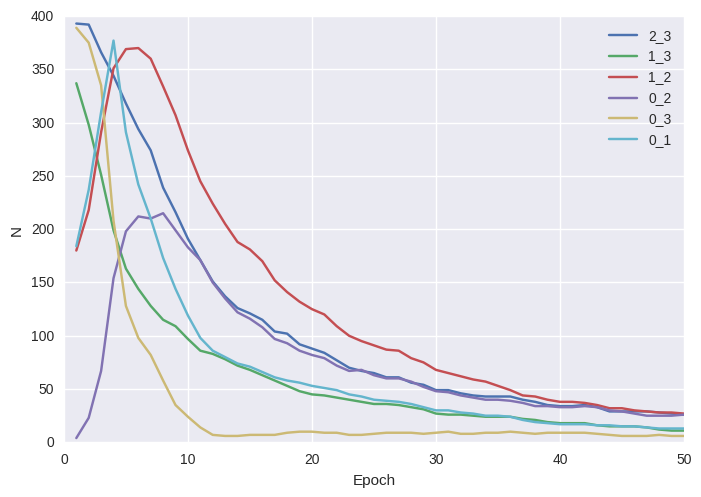

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Number_of_label_not_identically_classfied_(test)


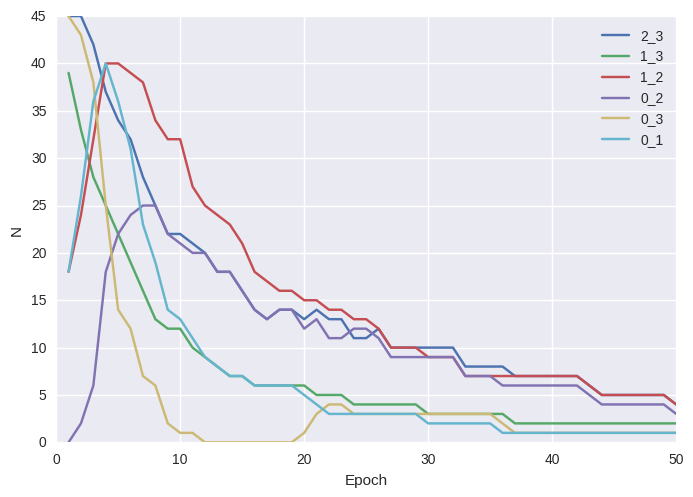

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Number_of_label_identically_classfied_(train)


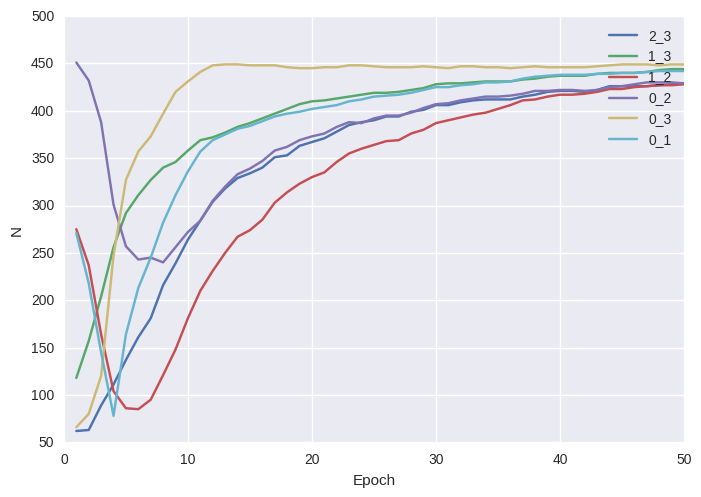

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Number_of_label_identically_classfied_(test)


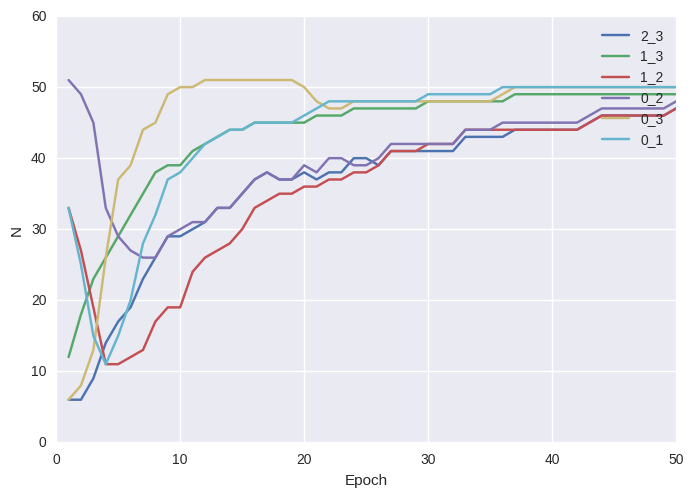

boston_adam_no_soft_max_mean_squared_error_4_adam_50_False_Weight_difference_above_threshold


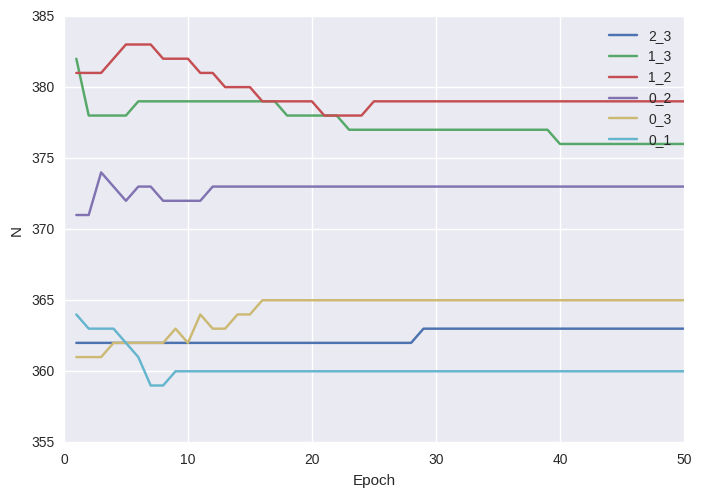

In [10]:
experiment.plotAllOutcomes(True)

In [11]:
models = experiment.models

In [12]:
from experiments.plotting import *


allLayerWeightDistributions(models)
layerByLayerWeightDistribution(models)

NameError: name 'allLayerWeightDistributions' is not defined